<a href="https://colab.research.google.com/github/soave424/pythondata/blob/main/%EB%B3%91%EC%95%84%EB%A6%AC%EB%B0%985~6%EC%A3%BC%EC%B0%A8%EB%AF%B8%EC%85%98(%EC%A3%A0%EC%9D%B4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개인프로젝트 (1인 1역 정하기) 

```
# 완료
1. 1인 1역 이름 / 내용  입력 (csv) 
2. 학생 명단 (csv) 
3. 역할별 학생 수 정하기 (csv파일에 숫자 넣어)
4. 학생 배정 (랜덤)
5. 순서대로 다음 역할 나오는 옵션 (앞으로/뒤로 추가)
6. 랜덤으로 했을 때 몇 번씩 했는지 그래프
7. 학생 이름 입력하면 역할과 하는 일 설명 소개
```
<진행중>
8. 만약 3번 이상 반복이면 다른 역할 배정 -- 제대로 실행이 안 될때가 있음. 
  (오류 : 런타임오류, 한번 실행했는데 14개 뜨거나, 숫자 넘어도 나오거나)


In [ ]:
# 미리 설치
# csv 라이브러리 설치 
import csv  
# 그래프를 만들기 위한 라이브러리 불러오기
import matplotlib.pyplot as plt 
import matplotlib as mpl
# 랜덤 라이브러리 
import random 
# 그래프 한글 설치 
!apt-get install fonts-nanum -qq > /dev/null
!fc-cache -fv
plt.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont


In [ ]:
# 1인 1역과 학생 명단 파일 올리기 
from google.colab import files
files.upload()

In [23]:
# CSV 파일 리스트로 만들기 (1인 1역, 학생명단) 
data_s = csv.reader(open('student.csv')) # 파일 읽기
data_r = csv.reader(open('roll.csv'))
next(data_r) # 데이터 처리 
next(data_s)
rollper = {} # 역할별 인원 수 체크 
rolllist={}  # 역할 이름과 하는 일
rollall = [] # 역할 수 만큼 리스트 생성
student = [] # 학생 명단 
for row in data_r :  # 역할 데이터 처리 
  rolllist[row[0]]=row[1]
  rollper[row[0]]=int(row[2])
  for i in range(int(row[2])):
    rollall.append(row[0])
for name in data_s : # 학생 명단 리스트화 
  student.append(name[1])
roll_mo = rollall.copy() #학생명단은 고정, 역할을 (순서대로/랜덤) 나눠 실행하기 위해 복제
# 학생별 리스트를 만들어서 맡은 역할을 누적해가기 
# (역할 순서를 섞거나 이동한 뒤 그 리스트를 순서대로 넣고 일대일 대응으로 보내기)
student_roll = []
for name in student :
  student_roll.append([])
# 학생별 역할이 바뀔 때마다 누적해서 기록 
def listupgrade() :
  a=0
  for name in student :
    student_roll[a].append(rollall[a])
    a=a+1

In [24]:
# 학생명단 리스트와 1인 1역 리스트 일대일 대응 (순서대로) 
def match() : 
  matching = {K:V for K, V in zip(student, rollall)} #딕셔너리 컴프리헨션
  return matching
match()
listupgrade()

In [ ]:
# 역할 명단 하나씩 이동하기 함수 이용
def moveone() : 
  a=roll_mo[0] # 첫 번째 역할을 
  del roll_mo[0] # 없애고 
  roll_mo.append(a) # 뒤로 추가 
# 일대일 대응하여 출력
def match(rolllist) : #학생명단은 key값으로 역할명단은 value값으로 묶기
  matching = {K:V for K, V in zip(student, rolllist)}  
  return matching
moveone()
listupgrade()
print(match(roll_mo))

In [ ]:
# 역할 명단 하나씩 이동하기 함수 이용
def moveone() : 
  a=roll_mo[-1] # 마지막 역할을 
  del roll_mo[-1] # 없애고 
  roll_mo.insert(0, a) # 앞으로 추가 
# 일대일 대응하여 출력
def match(rolllist) : #학생명단은 key값으로 역할명단은 value값으로 묶기
  matching = {K:V for K, V in zip(student, rolllist)}  
  return matching
moveone()
listupgrade()
print(match(roll_mo))




In [ ]:
# 역할 순서를 랜덤으로 섞어서 일대일 대응 (학생명단은 고정)
random.shuffle(rollall)
listupgrade()
print(match(rollall))

In [28]:
# 역할이 뽑혔을 때 3번 이상 했으면 다른 역할로 정하기

def rematch() :
  random.shuffle(rollall) #섞고 
  for i in range(len(rollall)) : 
    count={} #개별 딕셔너리 만들어서
    for j in student_roll[i]: # 역할 별 횟수 세고
      try: count[j] += 1 
      except: count[j]=1
    rollname=rollall[i-1]
    try : 
      if count[rollname] > 3: # 이번에 배정된 역할이 3초과하면 
        rematch() # 다시 함수 처음부터 실행
    except : KeyError # 처음 배정 받는 역할이 있어 오류나는거 방지
  listupgrade()

rematch()

학생 이름을 입력 하세요 : 김이준
김이준의 이번 주 역할은 - 책장 (책장 먼지 닦고 정리) 입니다


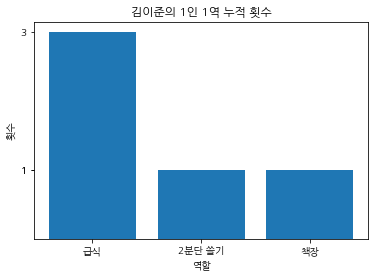

In [29]:
# 누적 데이터를 가지고 그래프 만들어보기 
count={}
x=[]
y=[]
def makedic(list): # 개별 역할 횟수 위한 딕셔너리  
  for i in list:
    try: count[i] += 1
    except: count[i]=1
  for key in count.keys():
    x.append(key)
  for value in count.values():
    y.append(value)

f_name = input("학생 이름을 입력 하세요 : ")
f_num = student.index(f_name)
f_roll = student_roll[f_num][-1]
f_do = rolllist[f_roll]
print(f"{f_name}의 이번 주 역할은 - {f_roll} ({f_do}) 입니다")
makedic(student_roll[f_num])
plt.bar(x,y) # 막대그래프로 만들기 
plt.title(f"{f_name}의 1인 1역 누적 횟수")
plt.xlabel("역할")
plt.ylabel("횟수")
plt.yticks(sorted(y))

plt.show()

In [30]:
print("이번 주 역할표입니다")
for i in range(len(student_roll)) :
  print(student[i],student_roll[i][-1])

이번 주 역할표입니다
강승기 급식
김이준 책장
김진휘 1분단 쓸기
박상진 신발장
서태웅 교실 뒤 쓸기
신승민 분리수거
오윤호 교실 앞 쓸기
윤민준 급식
이준혁 급식
홍윤기 복도 쓸기
홍준기 신발장
황유찬 급식
강민서 칠판
김민정 3분단 쓸기
김서진 쓰레기통 비우기
김소은 분리수거
김예슬 2분단 쓸기
어지은 검사
원예봄 복도 쓸기
이시온 쓰레기통 비우기
이준이 창틀
장하린 칠판
정하윤 창틀
하예린 급식
